In [6]:
# Importing libraries
# pandas for datatframe, numpy for the maths, matplotlib for visualisatioon of results
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# Import the library for predictive data analysis, used in machine learning, for create test data and 
# training data and to perfom linear regression 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [7]:
# Importing the data set
df=pd.read_csv('salaryData.csv')


# Exploring the data set
# The data set has only 2 columns
df.info()
df.head()
# Dataset.tail() to see last 5 rows
# The data set has only 2 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [8]:
print(df.shape)
# The data set has 2 column and 30 rows

(30, 2)


In [9]:
### Single selections using .iloc[] and DataFrame
### Rows:
# data.iloc[0] # first row of data frame
# data.iloc[1] # second row of data frame
# data.iloc[-1] # last row of data frame
### Columns:
# data.iloc[:,0] # first column of data frame 
# data.iloc[:,1] # second column of data frame
# data.iloc[:,-1] # last column of data frame

x= df.iloc[:, :-1].values
y= df.iloc[:, 1].values
print(y.shape)
print(x.shape)
# The iloc indexer for Pandas Dataframe is used for integer-location based indexing / selection by position.
# x is a matrix and matrix of features and matrix of independent variable np.array
# x is a vector and vector of the independent variable np.array

(30,)
(30, 1)


<Axes: >

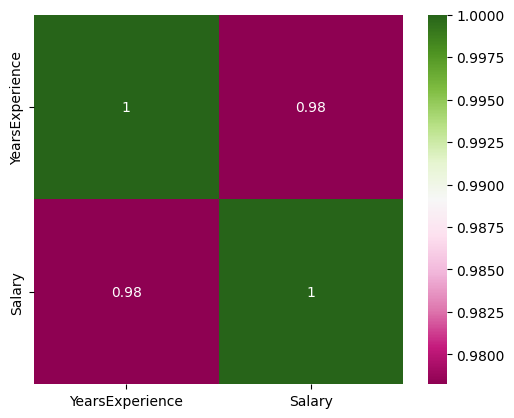

In [10]:
# Checking correlation between the data using heatmap in seaborn
c=df.corr()
sns.heatmap(c, vmax=1, annot=True, square=True, cmap='PiYG')

In [11]:
# Splitting the data into training sets and test sets: 
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size= 1/3, random_state=1)

In [12]:
# FITTING THE SIMPLE LINEAR REGRESSION
# Create an object to contain the regression
# y = A +Bx
# y is the dependent variable (the variable we are trying to predict),
# x is the independent variable (the input feature used for prediction),
# B is the coefficient (slope) that represents the rate of change of y with respect to x,
# A is the constant (intercept) that represents the value of y when x is zero.

lr = LinearRegression()

# Fit the linear regression model to the training set, use the .fit() function
# The arguments of the fit function are the training data 

lr.fit(x_train,y_train)

LinearRegression()

In [13]:
y_prediction = lr.predict(x_test)
print(y_prediction)
print(x_test)

[ 74675.37776747  91160.02832519  61853.98288925  81086.07520659
  67348.86640849  88412.58656557 113139.56240215  44453.51841166
 105813.05104316  98486.53968418]
[[5.3]
 [7.1]
 [3.9]
 [6. ]
 [4.5]
 [6.8]
 [9.5]
 [2. ]
 [8.7]
 [7.9]]


Text(0, 0.5, 'Salary')

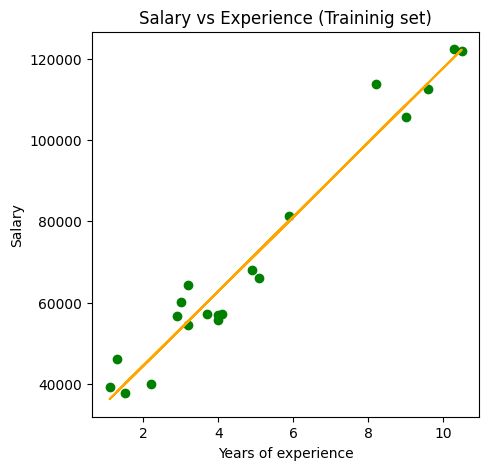

In [14]:
# Visualizing the training set results: 
# Real Values
fig, ax = plt.subplots(figsize=(5,5))
plt.scatter(x_train, y_train, color='Green') 
plt.plot(x_train, lr.predict(x_train), color='Orange' )
# Plot Regression Line(predicted values)
plt.title('Salary vs Experience (Traininig set)')
plt.xlabel('Years of experience')
plt.ylabel('Salary')

Text(0, 0.5, 'Salary')

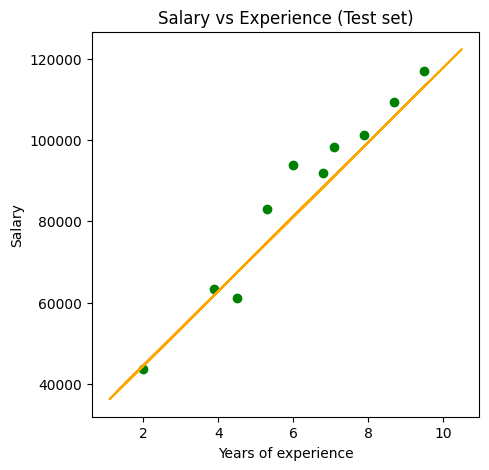

In [15]:
# Visualizing the test set results: 
# Test set
fig, ax = plt.subplots(figsize=(5,5))
plt.scatter(x_test, y_test, color='Green') 
# The linear regression trained on training set 
plt.plot(x_train, lr.predict(x_train), color='Orange') 
# The dot values are test values. The linear regression line is the same as in the previous plot, it is the model.
# Style the plot
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of experience')
plt.ylabel('Salary')


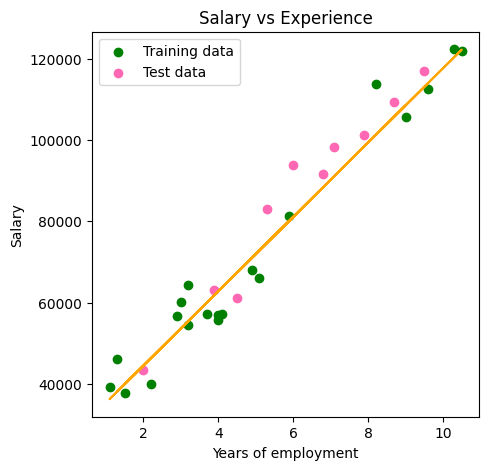

In [16]:
# Create scatter plot with different colors for each dataset
fig, ax = plt.subplots(figsize=(5,5))
plt.scatter(x_train, y_train, color='green', label='Training data')
plt.scatter(x_test, y_test, color='hotpink', label='Test data')
plt.plot(x_train, lr.predict(x_train), color='Orange') 

# Add labels and legend
plt.xlabel('Years of employment')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.legend()

In [24]:
# y = A +Bx
# y is the dependent variable (the variable we are trying to predict),
# x is the independent variable (the input feature used for prediction),
# B is the coefficient (slope) that represents the rate of change of y with respect to x,
# A is the constant (intercept) that represents the value of y when x is zero.

#Coef_ function is used to get the value of the coefficient
B_array=lr.coef_
B= ' '.join(map(str, B_array))
#Intercept_ function is used to get the value of constant(bias).
A=lr.intercept_
print(f"Coefficient = {A}")
print(f"Costant = {B}")

Coefficient = 26137.24001419694
Costant = 9158.139198731435


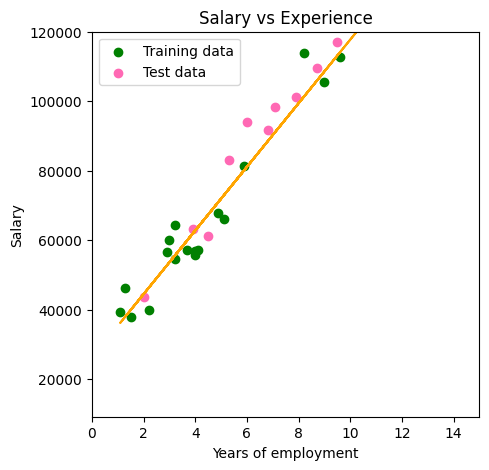

In [29]:
# Recreating the plot considering the slope and the intercept
fig, ax = plt.subplots(figsize=(5,5))
plt.scatter(x_train, y_train, color='green', label='Training data')
plt.scatter(x_test, y_test, color='hotpink', label='Test data')
plt.plot(x_train, lr.predict(x_train), color='Orange') 

# Set the x and y axis ranges
ax.axis([0,15, 9158, 120000])
#plt.xlim(0, 15)  # Set x-axis range from 0 to 50
#plt.ylim(9158.139198731435, None)  # Set y-axis range from 0 to 12
# Add labels and legend
plt.xlabel('Years of employment')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.legend()

In [17]:
import joblib
# Create the file to store the model in
filename = 'first_model.pkl'
# Save the model in the file
joblib.dump(lr, filename)

['first_model.pkl']

In [18]:
# Reload the model when needed use joblib.load() and predicting a value for years of employment entered by user
load_model = joblib.load(filename)
years_of_employment=int(input('Please enter number of years of employment:'))
# Using the model
p = load_model.predict([[years_of_employment]])
# Limiting the float numbers to 2, becasue the number represnt money
salary_prediction=np.around(p,2)
# Using .join to print a number instead of the array (no square brakets)
salary = ' '.join(map(str, salary_prediction))
print(f"Salary prediction: £{salary}")

Salary prediction: £53611.66
